In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change to relevant directory
%cd "/content/drive/My Drive/Class: ECBM E4060/Kaggle Files"

/content/drive/My Drive/Class: ECBM E4060/Kaggle Files


In [ ]:
# read prediction data
results_data = pd.read_csv('prediction_data.csv')
results_data

,Multome features,CITEseq features,Private Score,Public Score,Multiome explained variance,CITEseq explained variance
0,32,32,0.760828,0.809139,0.008240,0.131353
1,64,32,0.761387,0.809241,0.009176,0.131353
2,128,32,0.761632,0.809186,0.011000,0.131353
3,256,32,0.761238,0.808941,0.014595,0.131353
4,32,64,0.764307,0.811029,0.008240,0.139054
5,64,64,0.764866,0.811131,0.009176,0.139054
6,128,64,0.765111,0.811076,0.011000,0.139054
7,256,64,0.763933,0.810929,0.014595,0.139054
8,32,128,0.764900,0.811324,0.008240,0.148959
9,64,128,0.764468,0.811064,0.009176,0.148959


Below, a test is performed to check if the resulting performance is a flat line or not.

In [ ]:
stats.kstest(list(results_data['Public Score']), 
             [np.mean(list(results_data['Public Score'])) for i in range(len(results_data['Public Score']))])

KstestResult(statistic=0.75, pvalue=0.00011965121670330985)

In [ ]:
stats.kstest(list(results_data['Private Score']), 
             [np.mean(list(results_data['Private Score'])) for i in range(len(results_data['Private Score']))])

KstestResult(statistic=0.6875, pvalue=0.0006700468135385351)

Below, the same is checked by grouping feature counts

In [ ]:
c_grouped_public_pval = []
c_grouped_private_pval = []
m_grouped_public_pval = []
m_grouped_private_pval = []

for num in [32, 64, 128, 256]:
  public_pval = stats.kstest(list(results_data[results_data['CITEseq features']==num]['Public Score']), 
                [np.mean(list(results_data[results_data['CITEseq features']==num]['Public Score'])) for i in range(len(list(results_data[results_data['CITEseq features']==num]['Public Score'])))]).pvalue
  private_pval = stats.kstest(list(results_data[results_data['CITEseq features']==num]['Private Score']), 
                [np.mean(list(results_data[results_data['CITEseq features']==num]['Private Score'])) for i in range(len(list(results_data[results_data['CITEseq features']==num]['Private Score'])))]).pvalue
  
  c_grouped_public_pval.append(public_pval)
  c_grouped_private_pval.append(private_pval)

  public_pval = stats.kstest(list(results_data[results_data['Multome features']==num]['Public Score']), 
                [np.mean(list(results_data[results_data['Multome features']==num]['Public Score'])) for i in range(len(list(results_data[results_data['Multome features']==num]['Public Score'])))]).pvalue
  private_pval = stats.kstest(list(results_data[results_data['Multome features']==num]['Private Score']), 
                [np.mean(list(results_data[results_data['Multome features']==num]['Private Score'])) for i in range(len(list(results_data[results_data['Multome features']==num]['Private Score'])))]).pvalue
  m_grouped_public_pval.append(public_pval)
  m_grouped_private_pval.append(private_pval)

print("\nc_grouped_public_pval")
print(c_grouped_public_pval)

print("\nc_grouped_private_pval")
print(c_grouped_private_pval)

print("\nm_grouped_public_pval")
print(m_grouped_public_pval)

print("\nm_grouped_private_pval")
print(m_grouped_private_pval)


c_grouped_public_pval
[0.22857142857142862, 0.7714285714285716, 0.7714285714285716, 0.7714285714285716]

c_grouped_private_pval
[0.7714285714285716, 0.7714285714285716, 0.7714285714285716, 0.7714285714285716]

m_grouped_public_pval
[0.22857142857142862, 0.22857142857142862, 0.22857142857142862, 0.22857142857142862]

m_grouped_private_pval
[0.7714285714285716, 0.22857142857142862, 0.22857142857142862, 0.22857142857142862]


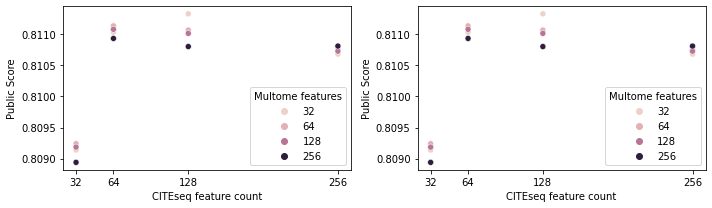

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.scatterplot(data=results_data, x='CITEseq features', y='Public Score', hue='Multome features')
plt.xticks([32,64,128,256])
plt.xlabel("CITEseq feature count")

plt.subplot(1,2,2)
sns.scatterplot(data=results_data, x='CITEseq features', y='Public Score', hue='Multome features')
plt.xticks([32,64,128,256])
plt.xlabel("CITEseq feature count")

plt.tight_layout()

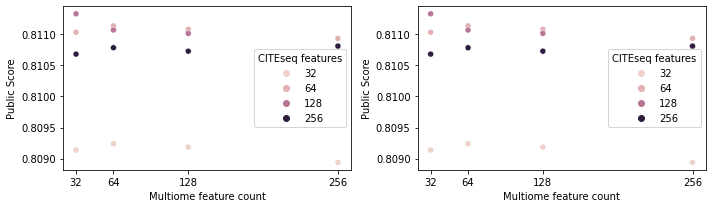

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.scatterplot(data=results_data, x='Multome features', y='Public Score', hue='CITEseq features')
plt.xticks([32,64,128,256])
plt.xlabel("Multiome feature count")

plt.subplot(1,2,2)
sns.scatterplot(data=results_data, x='Multome features', y='Public Score', hue='CITEseq features')
plt.xticks([32,64,128,256])
plt.xlabel("Multiome feature count")

plt.tight_layout()

The above results suggest that so long as CITEseq feature count is 64 and greater, the resulting performance is approximately equal.

In [ ]:
# [4:] removes all the entries where the feature count for multiome is 32
stats.kstest(list(results_data['Public Score'][4:]), 
             [np.mean(list(results_data['Public Score'][4:])) for i in range(len(results_data['Public Score'][4:]))])

KstestResult(statistic=0.5, pvalue=0.09954677170991616)

In [ ]:
stats.kstest(list(results_data['Private Score'][4:]), 
             [np.mean(list(results_data['Private Score'][4:])) for i in range(len(results_data['Private Score'][4:]))])

KstestResult(statistic=0.5, pvalue=0.09954677170991616)

Relationship between feature count and variances below

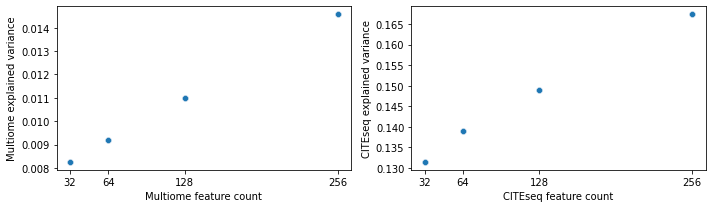

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.scatterplot(data=results_data, x='Multome features', y='Multiome explained variance')
plt.xticks([32,64,128,256])
plt.xlabel("Multiome feature count")

plt.subplot(1,2,2)
sns.scatterplot(data=results_data, x='CITEseq features', y='CITEseq explained variance')
plt.xticks([32,64,128,256])
plt.xlabel("CITEseq feature count")

plt.tight_layout()

In [ ]:
rvs1 = results_data['Multiome explained variance']
rvs2 = results_data['Private Score']
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1042.1369994344714, pvalue=6.007046971518137e-70)

In [ ]:
rvs1 = results_data['Multiome explained variance']
rvs2 = results_data['Public Score']
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1209.8207996624385, pvalue=6.836267553575236e-72)

In [ ]:
rvs1 = results_data['CITEseq explained variance']
rvs2 = results_data['Private Score']
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-175.63559935836201, pvalue=9.377109372765522e-47)

In [ ]:
rvs1 = results_data['CITEseq explained variance']
rvs2 = results_data['Public Score']
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-189.66374849134343, pvalue=9.371066601550407e-48)

In [ ]:
# Just as a test, we see that the p value is low if there IS a relationship
rvs1 = [1.1,1.2,1.3]
rvs2 = [11,12,13]
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-18.613313663734203, pvalue=4.903943341609167e-05)

In [ ]:
# Just as a test, we see that the p value is low if there is NOT a relationship
rvs1 = [1.1,1.2,1.3]
rvs2 = [100,10,-10]
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.9498560408658895, pvalue=0.3959721877459472)